In [1]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib


import rtmtools.lblrtm.aerutils as aerutils
importlib.reload(aerutils)
import rtmtools.clirad.sw.wrangle as cliradwrangle
importlib.reload(cliradwrangle)
import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
importlib.reload(rrtmgwrangle)

import climatools.offline_scripts.intermodel as scripts_intermodel
importlib.reload(scripts_intermodel)


<module 'climatools.offline_scripts.intermodel' from '/nuwa_cluster/home/jackyu/climatools/climatools/offline_scripts/intermodel.py'>

In [2]:
name_molecule = 'N2O' #r'$H_{2}O$'

In [4]:
#### Load CRD results

In [3]:
# Get lbl line-by-line results
pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples', 
                           'lbl_H2012_{name_molecule}_cut25'\
                           .format(name_molecule=name_molecule),
                           'OUTPUT_RADSUM')

#pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2008_h2O_cut25/OUTPUT_RADSUM'

pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
                                                cooling_rate=True, 
                                                signed_fluxes=True)

print(pathout_crd)

/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2012_N2O_cut25/OUTPUT_RADSUM


In [4]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = os.path.join('/nuwa_cluster/home/jackyu',
                            'radiation/crd/LW/examples',
                            'lbl_H1996_{name_molecule}_cut10'\
                            .format(name_molecule=name_molecule),
                            'OUTPUT_RADSUM')

#pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd1, 
#                                                 cooling_rate=True, 
#                                                 signed_fluxes=True)

#print(pathout_crd1)

In [5]:
#### Load CLIRAD results

In [6]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                              'radiation/clirad/LW/examples',
                              'mls75_{name_molecule}_H2012'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_CLIRAD.dat')

pnl_clirad = cliradwrangle.\
             OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad,
                                          cooling_rate=True, 
                                          signed_fluxes=True)

In [7]:
pathout_clirad_96 = os.path.join('/nuwa_cluster/home/jackyu',
                                 'radiation/clirad/LW/examples',
                                 'mls75_{name_molecule}'\
                                 .format(name_molecule=name_molecule),
                                 'OUTPUT_CLIRAD.dat')

#pnl_clirad_96 = cliradwrangle.\
#                OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad_96, 
#                                             cooling_rate=True,
#                                             signed_fluxes=True)

In [8]:
#### Load LBLRTM results

In [9]:
# Get AER line-by-line results
pathout_lblrtm = os.path.join('/nuwa_cluster/home/jackyu',
                              'line_by_line/aerlbl_v12.2_package',
                              'runs/LW/run_mls70pro_{name_molecule}'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_RADSUM')

pnl_lblrtm = aerutils.\
             OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_lblrtm, 
                                          signed_fluxes=True, 
                                          cooling_rate=True)

In [10]:
#### Load RRTMG results

In [11]:
pathout_rrtmg = os.path.join('/nuwa_cluster/home/jackyu',
                             'radiation/rrtmg/LW/examples',
                             'mls70_{name_molecule}'\
                             .format(name_molecule=name_molecule),
                             'OUTPUT_RRTM')

pnl_rrtmg = rrtmgwrangle.\
            OUTPUT_RRTM_to_pandasPanel(readfrom=pathout_rrtmg,
                                       signed_fluxes=True,
                                       cooling_rate = True)

# Whole spectral range

CRD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -418.754077   0.000000 -418.754077      0.000000
30   299.800000 -420.262227   0.815034 -419.447194     -0.025307
0   1013.000000 -423.662018   7.427418 -416.234600      0.100499

LBLRTM
     pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.0024 -418.480750   0.000000 -418.480750      0.000000
30   299.8000 -420.035007   0.816318 -419.218689     -0.026551
0   1013.0000 -423.532488   7.399698 -416.132790      0.071606

RRTMG
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -416.1990     0.0000 -416.1990       0.00000
30   299.70000 -419.2888     1.1835 -418.1053      -0.04741
0   1013.00000 -423.5988     9.6322 -413.9666       0.12698

CLIRAD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -420.586568   0.000010 -420.586558     -0.004519
30   299.800000 -421.559798   0.290795 -421.269003     -0.021148
0   1013.000000 -423.78618

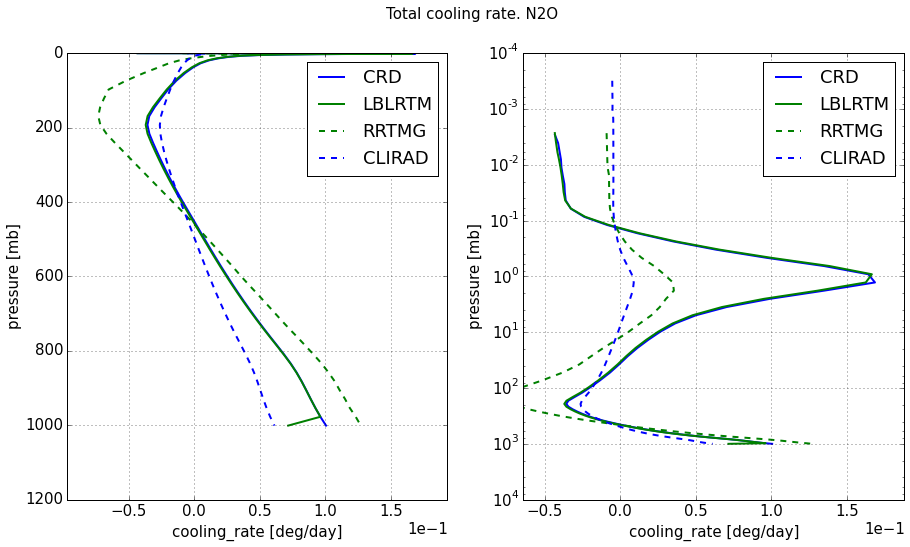

In [12]:
scripts_intermodel.lw_results_all_wavenumbers(
    infos_wavenumber=[('CRD', 'b', '-', pnl_crd),
                      ('LBLRTM', 'g', '-', pnl_lblrtm),
                      ('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_spectralband=[('CLIRAD', 'b', '--', pnl_clirad)],
    name_molecule=name_molecule)

In [13]:
html_download = ('<a href="./longwave_mls_{name_molecule}_total.xlsx"'
                 'download>longwave_mls_{name_molecule}_total.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In RRTMG's wavenumber bands

Flux tables and cooling rates in RRTMG spectral bands


RRTMG-LW. Spectral band 1. 10.0 ~ 350.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -54.5825          0  -54.5825            -0
30   299.70000 -54.5825          0  -54.5825            -0
0   1013.00000 -54.5825          0  -54.5825            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -54.573723   0.000000 -54.573723      0.000000
30   299.800000 -54.573758   0.000103 -54.573654      0.000002
0   1013.000000 -54.573788   0.000464 -54.573324      0.000005

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -54.662432   0.000000 -54.662432      0.000000
30   299.8000 -54.662465   0.000099 -54.662366      0.000002
0   1013.0000 -54.581667   0.000441 -54.581226      0.028694

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.008777   0.000000 -0.008777     -0.000000
30 -0.100000 -0.00

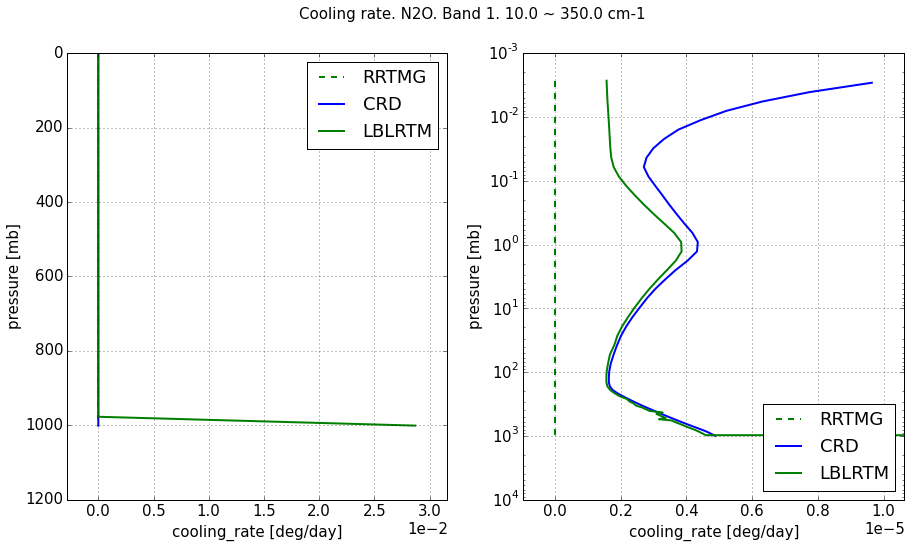


------------------------------------------------------------------------

RRTMG-LW. Spectral band 2. 350.0 ~ 500.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -60.9174          0  -60.9174            -0
30   299.70000 -60.9174          0  -60.9174            -0
0   1013.00000 -60.9174          0  -60.9174            -0

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -60.916637  0.000000e+00 -60.916637  0.000000e+00
30   299.800000 -60.916638  2.644420e-07 -60.916637  5.833407e-10
0   1013.000000 -60.916638  5.672589e-07 -60.916637  4.278038e-09

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -60.928909  0.000000e+00 -60.928909  0.000000e+00
30   299.8000 -60.928909  2.365118e-14 -60.928908  1.970407e-16
0   1013.0000 -60.917465  1.319991e-11 -60.917465  4.062457e-03

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003 -0.000763  0.000

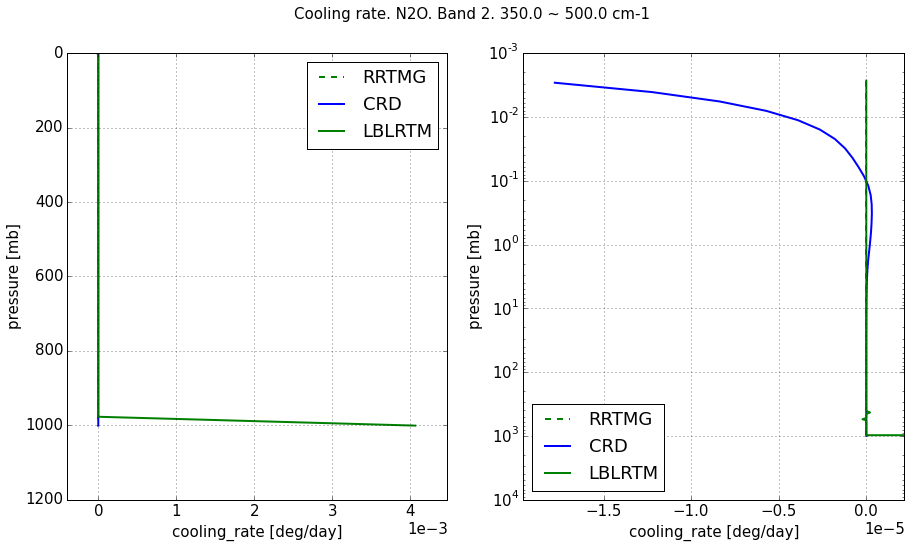


------------------------------------------------------------------------

RRTMG-LW. Spectral band 3. 500.0 ~ 630.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -56.8421     0.0000  -56.8421      -0.00000
30   299.70000 -57.7972     0.6708  -57.1264      -0.00026
0   1013.00000 -58.6466     3.8483  -54.7983       0.04434

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -57.411430   0.000000 -57.411430      0.000000
30   299.800000 -57.963318   0.482334 -57.480984     -0.000984
0   1013.000000 -58.652387   2.679702 -55.972684      0.030500

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -57.400181   0.000000 -57.400181      0.000000
30   299.8000 -57.959624   0.480748 -57.478876     -0.001111
0   1013.0000 -58.646623   2.644015 -56.002609      0.026495

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.569330   0.000000  0.569330     -0.00000

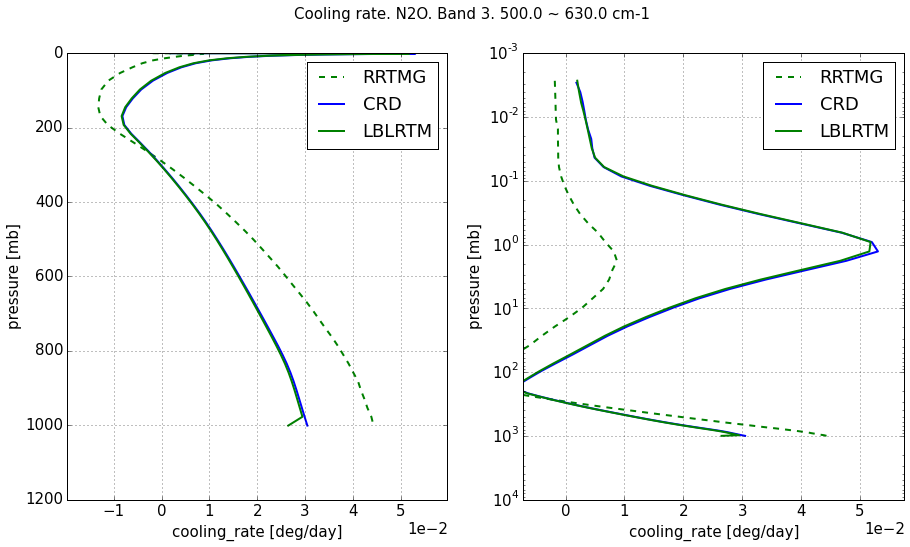


------------------------------------------------------------------------

RRTMG-LW. Spectral band 4. 630.0 ~ 700.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -30.8956     0.0000  -30.8956            -0
30   299.70000 -30.8956     0.0000  -30.8956            -0
0   1013.00000 -30.8956     0.0001  -30.8955            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -30.895565   0.000000 -30.895565      0.000000
30   299.800000 -30.897597   0.001189 -30.896408     -0.000013
0   1013.000000 -30.901144   0.016515 -30.884628      0.000293

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -30.879683   0.000000 -30.879683      0.000000
30   299.8000 -30.881447   0.001017 -30.880430     -0.000012
0   1013.0000 -30.895458   0.014311 -30.881147     -0.003627

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.000035   0.000000 -0.000035     -0.00000

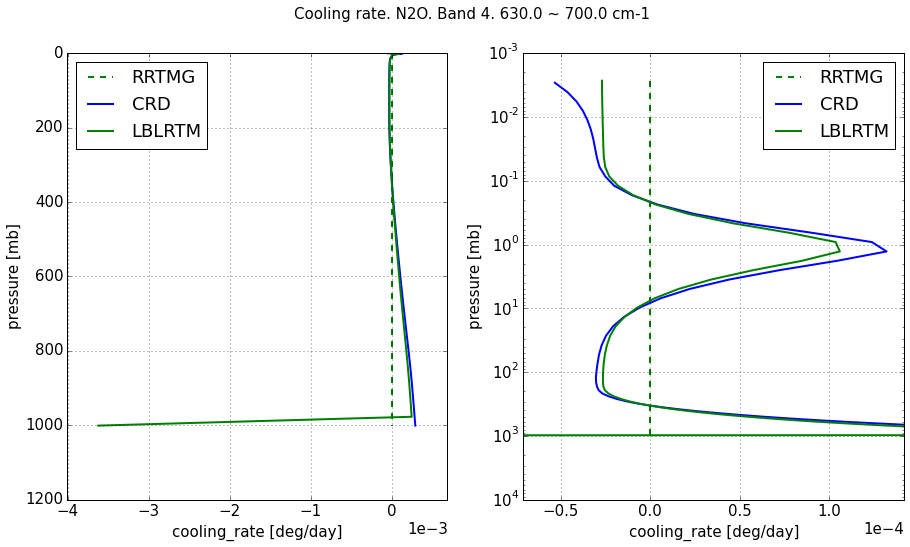


------------------------------------------------------------------------

RRTMG-LW. Spectral band 5. 700.0 ~ 820.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -48.8871          0  -48.8871            -0
30   299.70000 -48.8871          0  -48.8871            -0
0   1013.00000 -48.8871          0  -48.8871            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -48.898789   0.000000 -48.898789      0.000000
30   299.800000 -48.899194   0.000211 -48.898982     -0.000003
0   1013.000000 -48.899846   0.002765 -48.897080      0.000048

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -48.865341   0.000000 -48.865341      0.000000
30   299.8000 -48.865724   0.000199 -48.865525     -0.000003
0   1013.0000 -48.886744   0.002579 -48.884164     -0.007200

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.011689   0.000000  0.011689     -0.00000

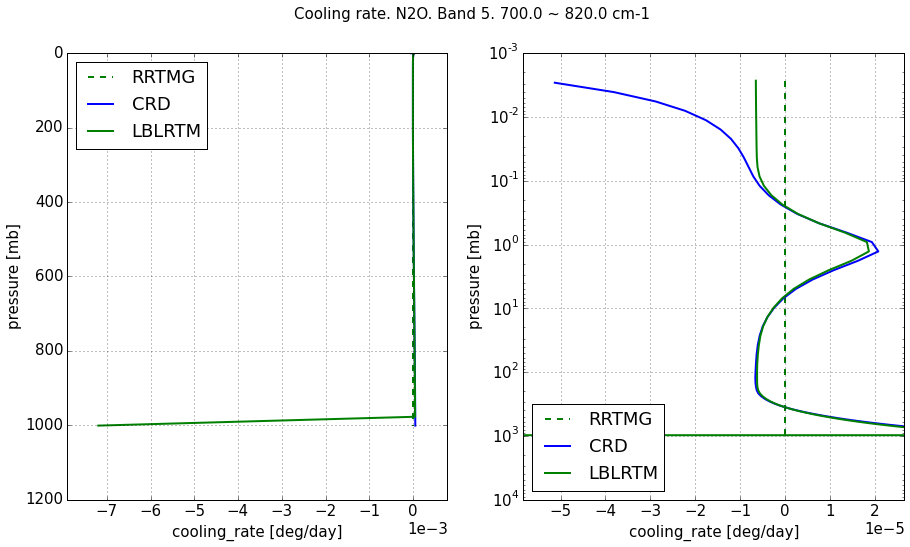


------------------------------------------------------------------------

RRTMG-LW. Spectral band 6. 820.0 ~ 980.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -53.9607          0  -53.9607            -0
30   299.70000 -53.9607          0  -53.9607            -0
0   1013.00000 -53.9607          0  -53.9607            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -53.980522   0.000000 -53.980522      0.000000
30   299.800000 -53.980790   0.000097 -53.980693     -0.000005
0   1013.000000 -53.981634   0.003101 -53.978533      0.000069

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -53.936391   0.000000 -53.936391      0.000000
30   299.8000 -53.936647   0.000092 -53.936556     -0.000005
0   1013.0000 -53.960338   0.002917 -53.957421     -0.008062

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.019822   0.000000  0.019822     -0.00000

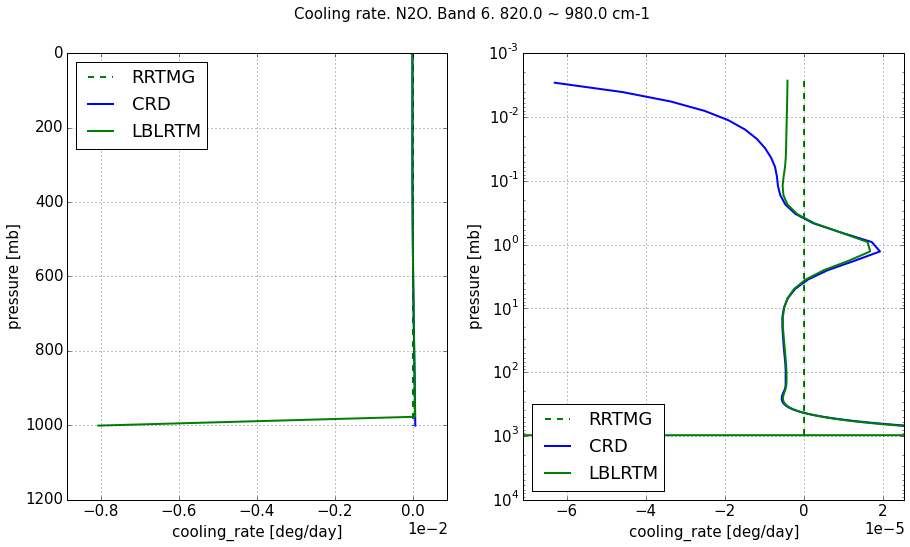


------------------------------------------------------------------------

RRTMG-LW. Spectral band 7. 980.0 ~ 1080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -26.6400     0.0000    -26.64            -0
30   299.70000 -26.6400     0.0000    -26.64            -0
0   1013.00000 -26.6401     0.0001    -26.64            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -26.653887   0.000000 -26.653887  0.000000e+00
30   299.800000 -26.653930   0.000012 -26.653918 -9.759643e-07
0   1013.000000 -26.654056   0.000405 -26.653651  9.107607e-06

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -26.629007   0.000000 -26.629007  0.000000e+00
30   299.8000 -26.629047   0.000012 -26.629036 -9.256260e-07
0   1013.0000 -26.640246   0.000382 -26.639863 -3.923895e-03

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.013887   0.000000  0.013887 -0.000000e+

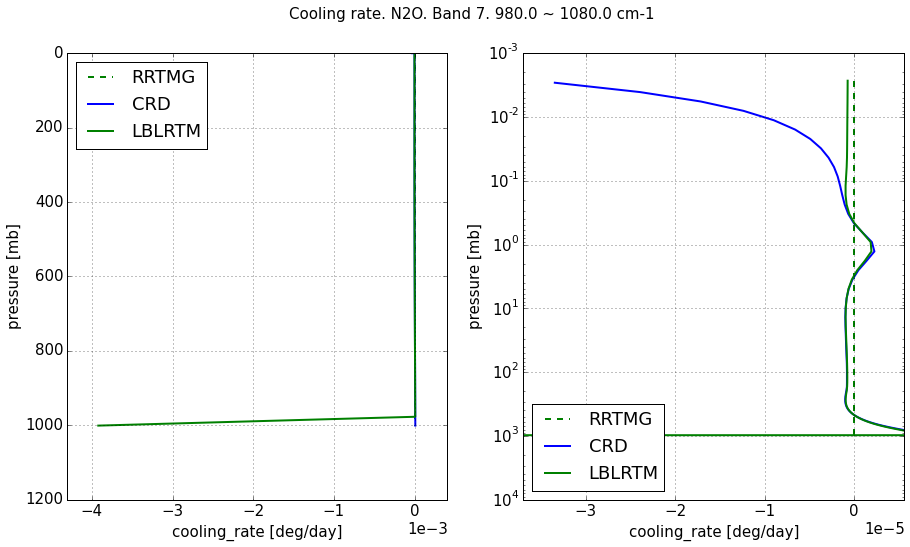


------------------------------------------------------------------------

RRTMG-LW. Spectral band 8. 1080.0 ~ 1180.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -21.2538     0.0000  -21.2538      -0.00000
30   299.70000 -21.3897     0.0309  -21.3588      -0.00228
0   1013.00000 -21.5225     0.3014  -21.2211       0.00468

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -21.282104   0.000000 -21.282104      0.000000
30   299.800000 -21.396953   0.026890 -21.370064     -0.002253
0   1013.000000 -21.535940   0.298396 -21.237544      0.004739

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -21.258663   0.000000 -21.258663      0.000000
30   299.8000 -21.376906   0.026988 -21.349918     -0.002290
0   1013.0000 -21.522739   0.294053 -21.228686      0.001592

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.028304   0.000000  0.028304     -0.000

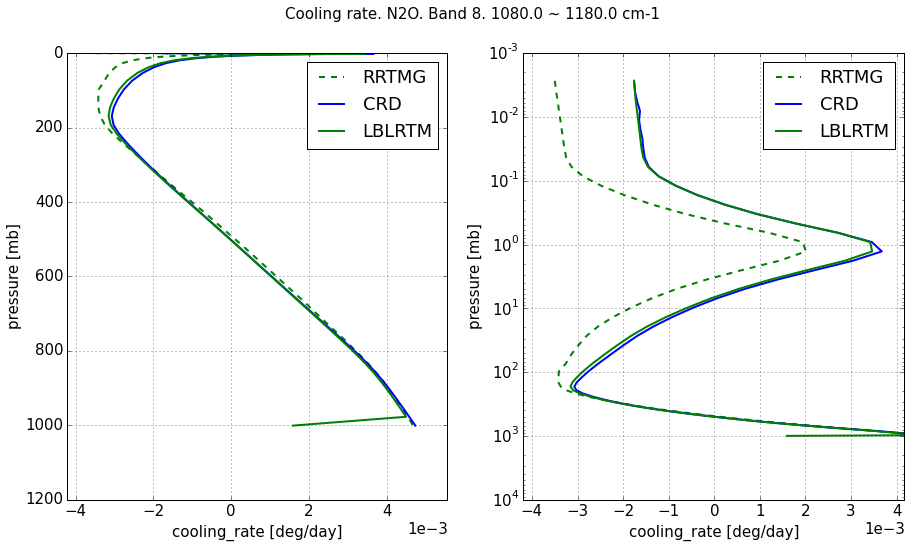


------------------------------------------------------------------------

RRTMG-LW. Spectral band 9. 1180.0 ~ 1390.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -26.6162     0.0000  -26.6162      -0.00000
30   299.70000 -28.5118     0.4650  -28.0468      -0.04055
0   1013.00000 -31.2994     4.8548  -26.4446       0.06665

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -28.328106   0.000000 -28.328106      0.000000
30   299.800000 -29.107477   0.292459 -28.815018     -0.019763
0   1013.000000 -31.323236   4.016164 -27.307072      0.058628

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -28.267582   0.000000 -28.267582      0.000000
30   299.8000 -29.071234   0.294766 -28.776468     -0.020440
0   1013.0000 -31.299603   3.997565 -27.302038      0.054034

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  1.711906   0.000000  1.711906     -0.000

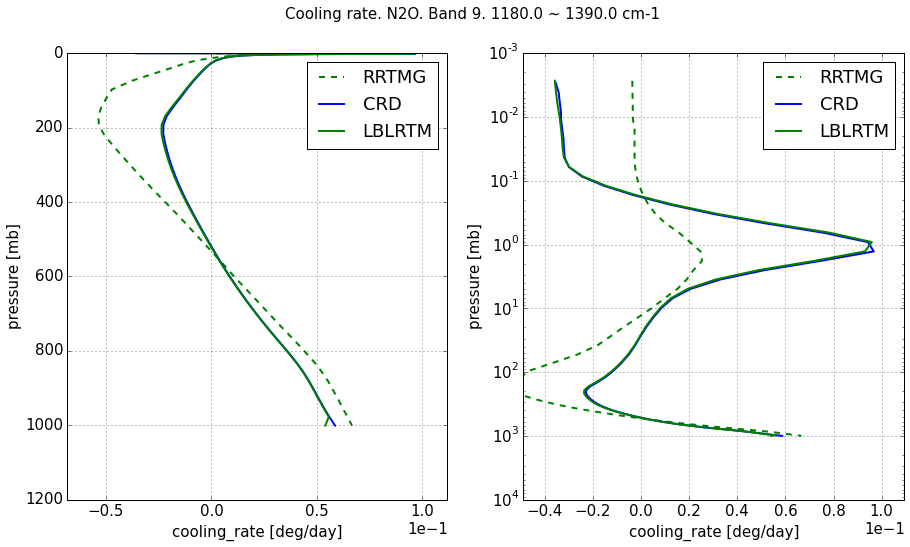


------------------------------------------------------------------------

RRTMG-LW. Spectral band 10. 1390.0 ~ 1480.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -8.8986          0   -8.8986            -0
30   299.70000  -8.8986          0   -8.8986            -0
0   1013.00000  -8.8986          0   -8.8986            -0

CRD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -8.906540  0.000000e+00 -8.906540  0.000000e+00
30   299.800000 -8.906546  8.984383e-07 -8.906545 -1.602700e-07
0   1013.000000 -8.906562  3.860367e-05 -8.906523  9.189533e-07

LBLRTM
     pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.0024 -8.894690  0.000000e+00 -8.894690  0.000000e+00
30   299.8000 -8.894695  8.135238e-07 -8.894694 -1.484076e-07
0   1013.0000 -8.898490  3.578351e-05 -8.898454 -1.340498e-03

RRTMG - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70  0.000003  0.007940  0.000000e+00  0.00

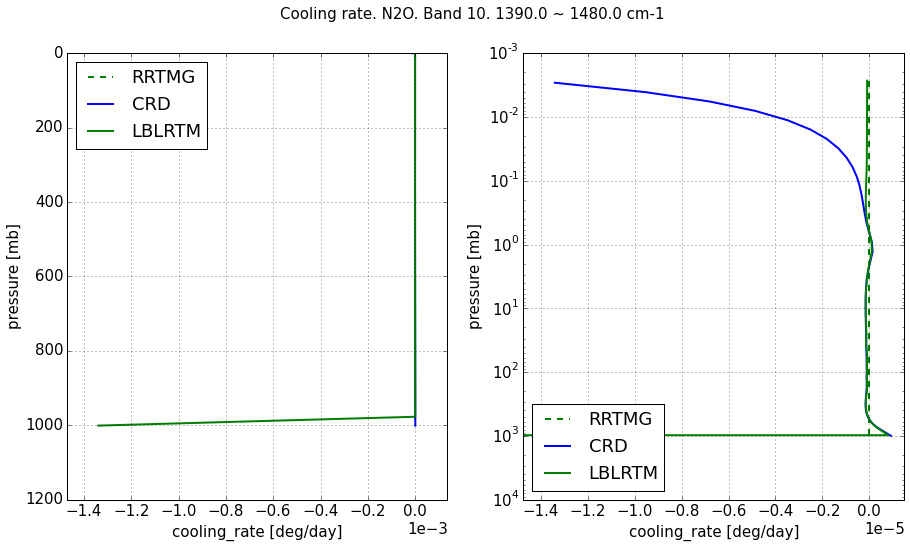


------------------------------------------------------------------------

RRTMG-LW. Spectral band 11. 1480.0 ~ 1800.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -17.8828          0  -17.8828            -0
30   299.70000 -17.8828          0  -17.8828            -0
0   1013.00000 -17.8828          0  -17.8828            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -17.900945   0.000000 -17.900945      0.000000
30   299.800000 -17.901474   0.000048 -17.901426     -0.000013
0   1013.000000 -17.902258   0.001232 -17.901026      0.000026

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -17.872756   0.000000 -17.872756      0.000000
30   299.8000 -17.873260   0.000045 -17.873214     -0.000012
0   1013.0000 -17.882889   0.001159 -17.881730     -0.003131

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.018145   0.000000  0.018145     -0.00

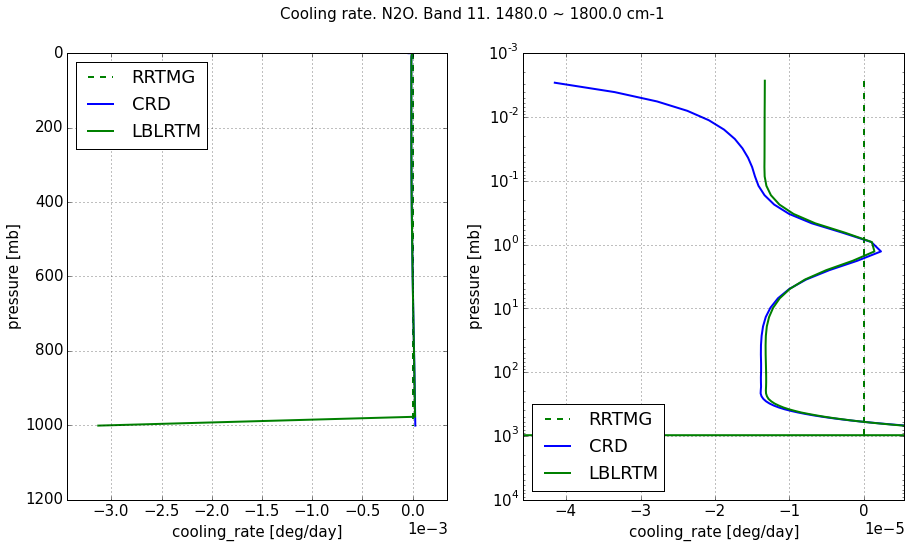


------------------------------------------------------------------------

RRTMG-LW. Spectral band 12. 1800.0 ~ 2080.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -5.9578          0   -5.9578            -0
30   299.70000  -5.9578          0   -5.9578            -0
0   1013.00000  -5.9578          0   -5.9578            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -5.961267   0.000000 -5.961267      0.000000
30   299.800000 -5.963371   0.000147 -5.963223     -0.000051
0   1013.000000 -5.965987   0.003314 -5.962673      0.000067

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -5.890945   0.000000 -5.890945      0.000000
30   299.8000 -5.892995   0.000140 -5.892855     -0.000050
0   1013.0000 -5.957771   0.003151 -5.954620     -0.022043

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.003467   0.000000  0.003467     -0.000000
30 -0.10000

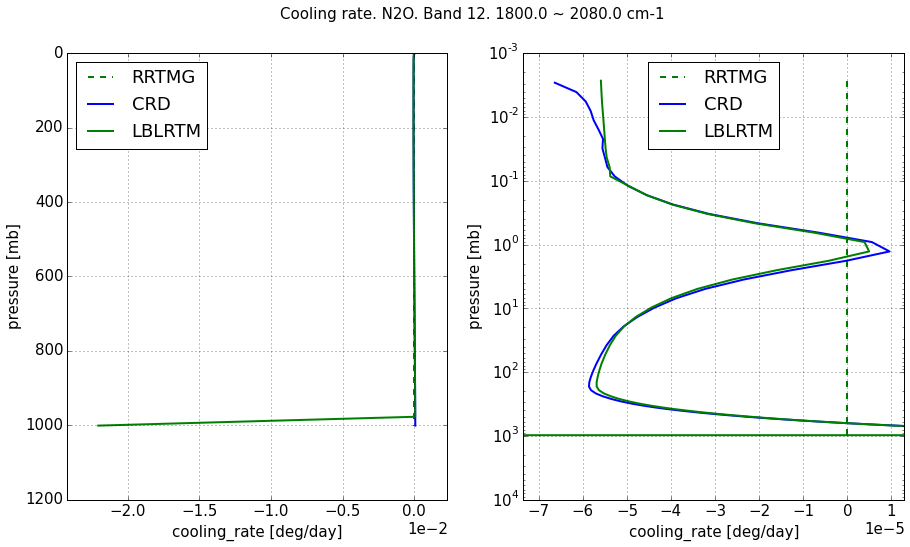


------------------------------------------------------------------------

RRTMG-LW. Spectral band 13. 2080.0 ~ 2250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -1.1369     0.0000   -1.1369      -0.00000
30   299.70000  -1.2114     0.0158   -1.1956      -0.00295
0   1013.00000  -1.6390     0.4982   -1.1408       0.00789

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -1.276416   0.000000 -1.276416      0.000000
30   299.800000 -1.324260   0.011003 -1.313257     -0.001891
0   1013.000000 -1.641655   0.370993 -1.270661      0.005360

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -1.239484   0.000000 -1.239484      0.000000
30   299.8000 -1.295647   0.011590 -1.284057     -0.002200
0   1013.0000 -1.639014   0.400582 -1.238433      0.005858

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.139516   0.000000  0.139516     -0.000000
30 -0.10000

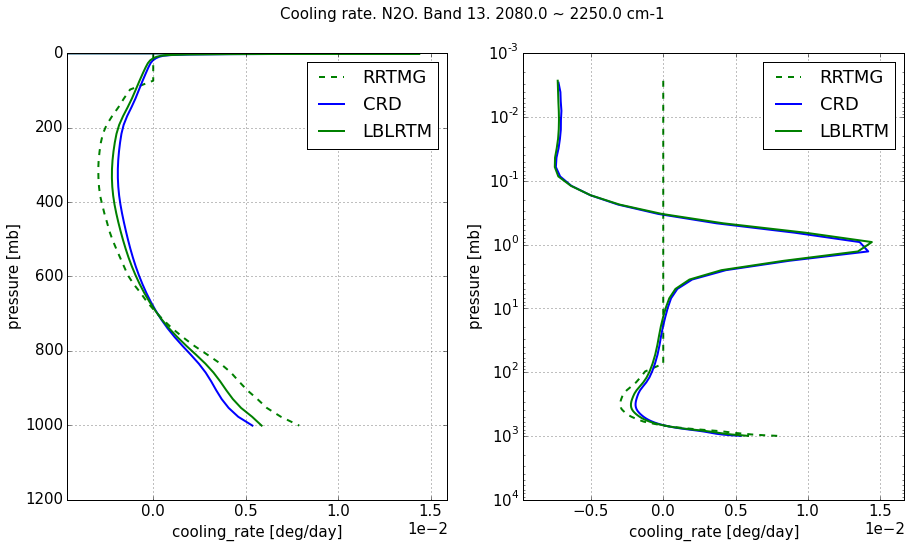


------------------------------------------------------------------------

RRTMG-LW. Spectral band 14. 2250.0 ~ 2380.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.7315          0   -0.7315            -0
30   299.70000  -0.7315          0   -0.7315            -0
0   1013.00000  -0.7316          0   -0.7316            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.710701   0.000000 -0.710701      0.000000
30   299.800000 -0.714113   0.000351 -0.713761     -0.000149
0   1013.000000 -0.732844   0.023702 -0.709142      0.000502

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.709671   0.000000 -0.709671      0.000000
30   299.8000 -0.713066   0.000341 -0.712725     -0.000146
0   1013.0000 -0.731556   0.022578 -0.708977      0.000313

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.020799   0.000000 -0.020799     -0.000000
30 -0.10000

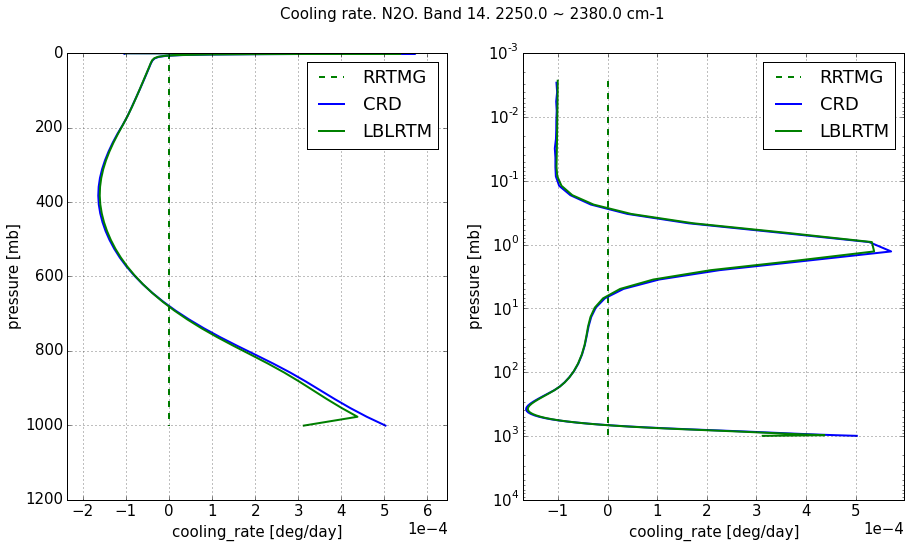


------------------------------------------------------------------------

RRTMG-LW. Spectral band 15. 2380.0 ~ 2600.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.5247     0.0000   -0.5247      -0.00000
30   299.70000  -0.5534     0.0010   -0.5524      -0.00137
0   1013.00000  -0.6658     0.1293   -0.5365       0.00342

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.651375   0.000000 -0.651375      0.000000
30   299.800000 -0.656420   0.000178 -0.656242     -0.000172
0   1013.000000 -0.667119   0.010151 -0.656969      0.000239

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.640733   0.000000 -0.640733      0.000000
30   299.8000 -0.648746   0.000274 -0.648472     -0.000274
0   1013.0000 -0.665840   0.015485 -0.650355      0.000210

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003  0.126675   0.000000  0.126675     -0.000000
30 -0.10000

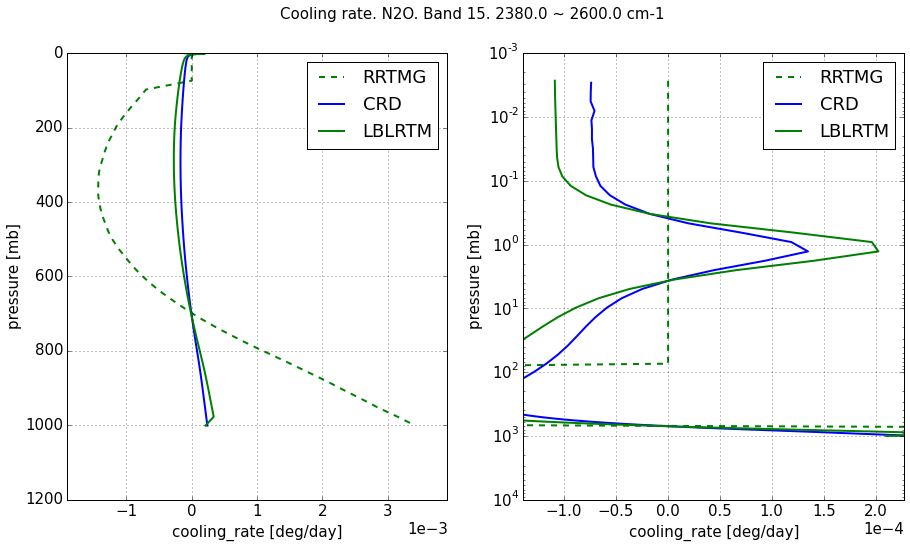


------------------------------------------------------------------------

RRTMG-LW. Spectral band 16. 2600.0 ~ 3250.0 cm-1

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.4713          0   -0.4713            -0
30   299.70000  -0.4713          0   -0.4713            -0
0   1013.00000  -0.4713          0   -0.4713            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -0.403574   0.000000 -0.403574      0.000000
30   299.800000 -0.403895   0.000007 -0.403889     -0.000009
0   1013.000000 -0.404431   0.000471 -0.403960      0.000012

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -0.401605   0.000000 -0.401605      0.000000
30   299.8000 -0.401920   0.000006 -0.401914     -0.000009
0   1013.0000 -0.403547   0.000442 -0.403105     -0.000386

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70  0.000003 -0.067726   0.000000 -0.067726     -0.000000
30 -0.10000

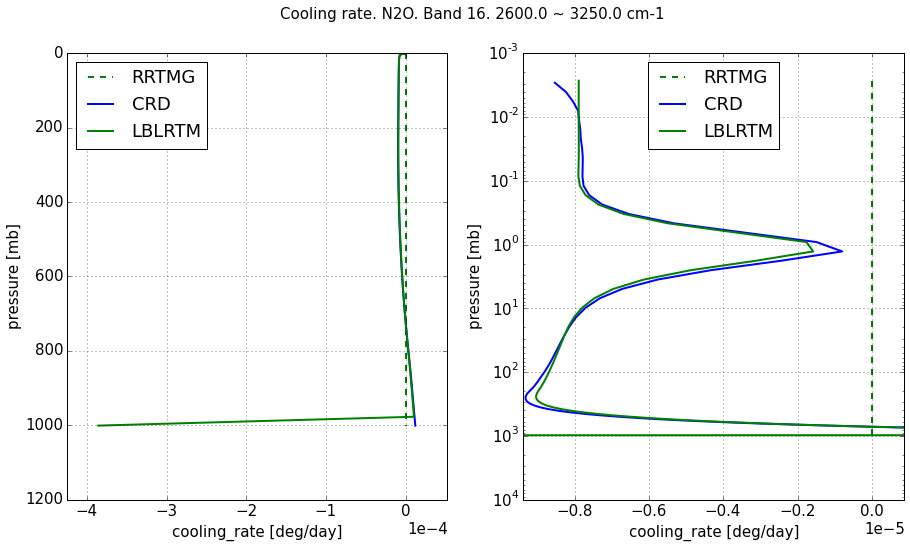


------------------------------------------------------------------------



In [14]:
print('Flux tables and cooling rates in RRTMG spectral bands')
print()
print()

scripts_intermodel.lw_results_by_rrtmg_bands(
    infos_rrtmg=[('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd), 
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [15]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_rrtmg_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In CLIRAD's wavenumber bands

Flux tables and cooling rates in CLIRAD spectral bands


CLIRAD-LW Spectral band 1. 0 ~ 340 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -51.09212   0.000003 -51.092117 -5.771265e-07
30   299.800000 -51.09212   0.000003 -51.092117  2.273129e-09
0   1013.000000 -51.09213   0.000005 -51.092125  4.439772e-09

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -51.092975   0.000000 -51.092975      0.000000
30   299.800000 -51.093010   0.000104 -51.092906      0.000002
0   1013.000000 -51.093040   0.000466 -51.092574      0.000005

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -51.180207   0.000000 -51.180207      0.000000
30   299.8000 -51.180240   0.000100 -51.180141      0.000002
0   1013.0000 -51.100657   0.000444 -51.100213      0.028263

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0  0.000855   0.000003  0.000858 -5.771265e-07
30      

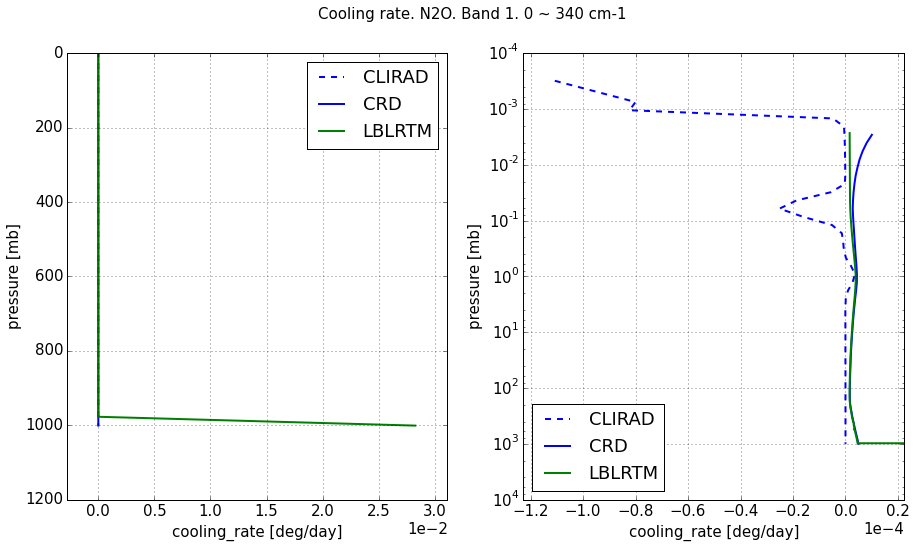


------------------------------------------------------------------------

CLIRAD-LW Spectral band 2. 340 ~ 540 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -82.31579   0.000003 -82.315787 -1.784270e-06
30   299.800000 -82.31579   0.000005 -82.315785  3.727262e-09
0   1013.000000 -82.31579   0.000008 -82.315782  1.023691e-08

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -82.315723   0.000000 -82.315723  0.000000e+00
30   299.800000 -82.315749   0.000022 -82.315728  3.202640e-08
0   1013.000000 -82.315835   0.000547 -82.315287  1.162660e-05

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -82.326775   0.000000 -82.326775  0.000000e+00
30   299.8000 -82.326802   0.000022 -82.326780  3.107801e-08
0   1013.0000 -82.315849   0.000542 -82.315306  3.929928e-03

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.000067   0.000003 -0.000064 -1

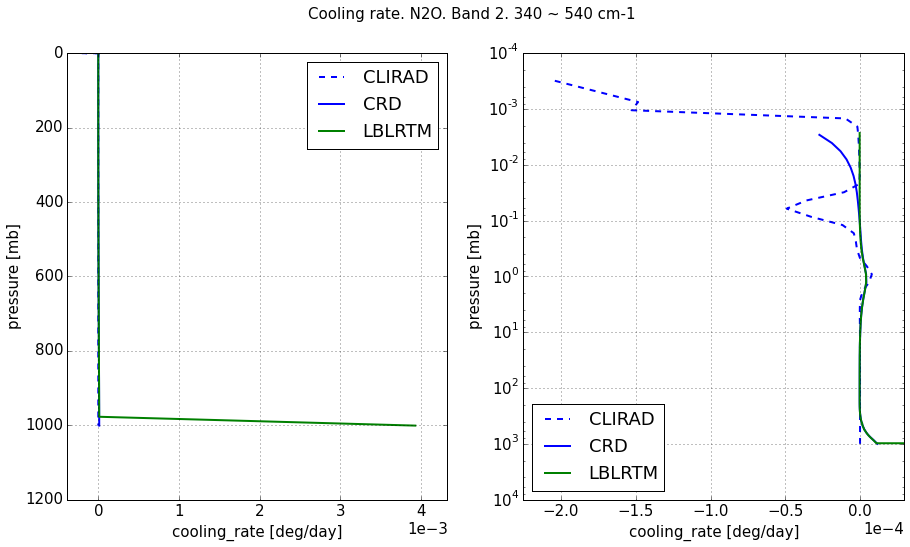


------------------------------------------------------------------------

CLIRAD-LW Spectral band 3. 540 ~ 800 cm-1

CLIRAD
       pressure  flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -112.816   0.000003 -112.815997 -3.838177e-06
30   299.800000 -112.816   0.000005 -112.815995  3.702570e-09
0   1013.000000 -112.816   0.000011 -112.815989  1.932914e-08

CRD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -111.590332   0.000000 -111.590332      0.000000
30   299.800000 -112.144630   0.483713 -111.660917     -0.001001
0   1013.000000 -112.837813   2.698437 -110.139376      0.030829

LBLRTM
     pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.0024 -111.538223   0.000000 -111.538223      0.000000
30   299.8000 -112.099785   0.481941 -111.617844     -0.001126
0   1013.0000 -112.816764   2.660362 -110.156401      0.017419

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -1.225668   0.000

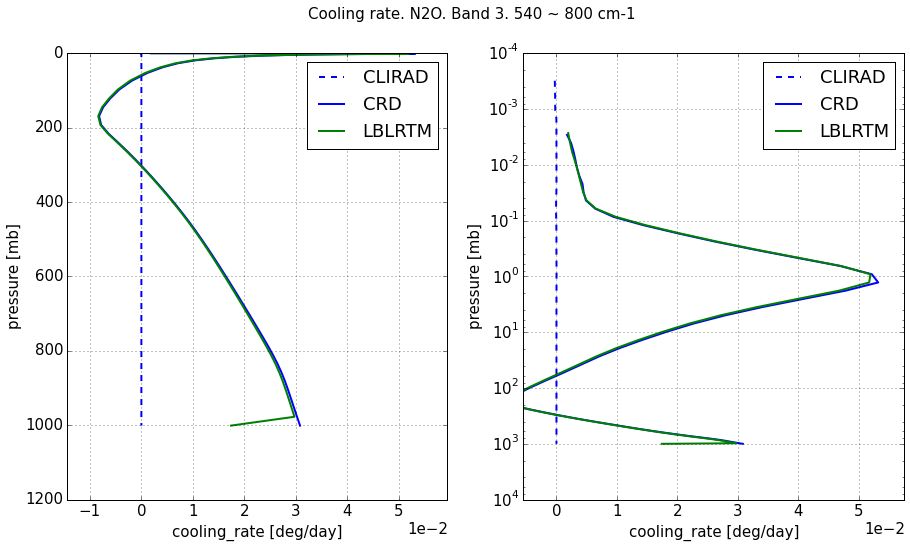


------------------------------------------------------------------------

CLIRAD-LW Spectral band 4. 800 ~ 980 cm-1

CLIRAD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -61.64931  6.214958e-10 -61.64931            -0
30   299.800000 -61.64931  6.214977e-10 -61.64931            -0
0   1013.000000 -61.64931  6.214976e-10 -61.64931            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -61.680131   0.000000 -61.680131      0.000000
30   299.800000 -61.680399   0.000097 -61.680302     -0.000005
0   1013.000000 -61.681243   0.003101 -61.678142      0.000069

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -61.630408   0.000000 -61.630408      0.000000
30   299.8000 -61.630664   0.000092 -61.630572     -0.000005
0   1013.0000 -61.657526   0.002917 -61.654609     -0.009188

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.030821  6.214958e-1

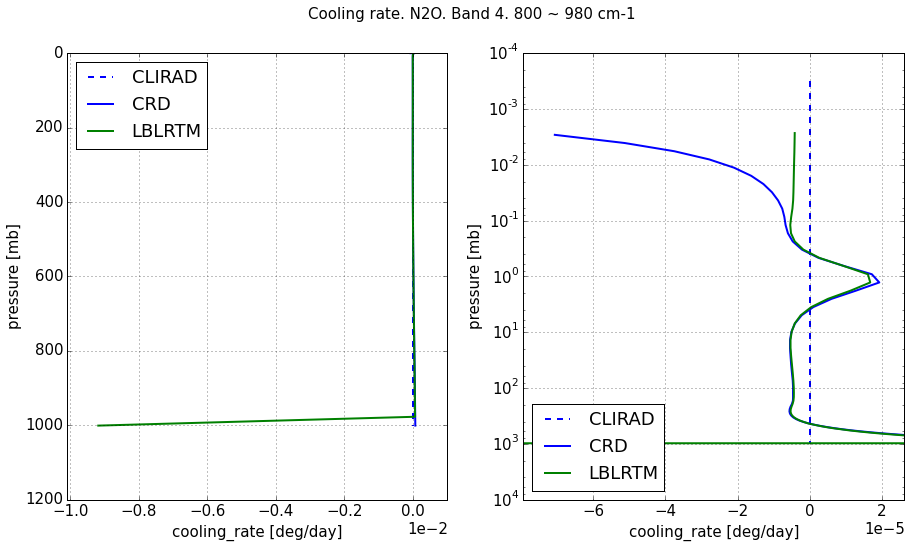


------------------------------------------------------------------------

CLIRAD-LW Spectral band 5. 980 ~ 1100 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -31.34389  4.351434e-07 -31.343890 -1.434995e-06
30   299.800000 -31.34389  9.052445e-07 -31.343889 -3.867155e-11
0   1013.000000 -31.34389  3.112896e-06 -31.343887  8.022594e-09

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -31.354057   0.000000 -31.354057      0.000000
30   299.800000 -31.354101   0.000013 -31.354088     -0.000001
0   1013.000000 -31.354231   0.000420 -31.353811      0.000009

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -31.324550   0.000000 -31.324550  0.000000e+00
30   299.8000 -31.324591   0.000012 -31.324579 -9.448585e-07
0   1013.0000 -31.337711   0.000394 -31.337316 -4.604370e-03

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0  0.010167  4.3514

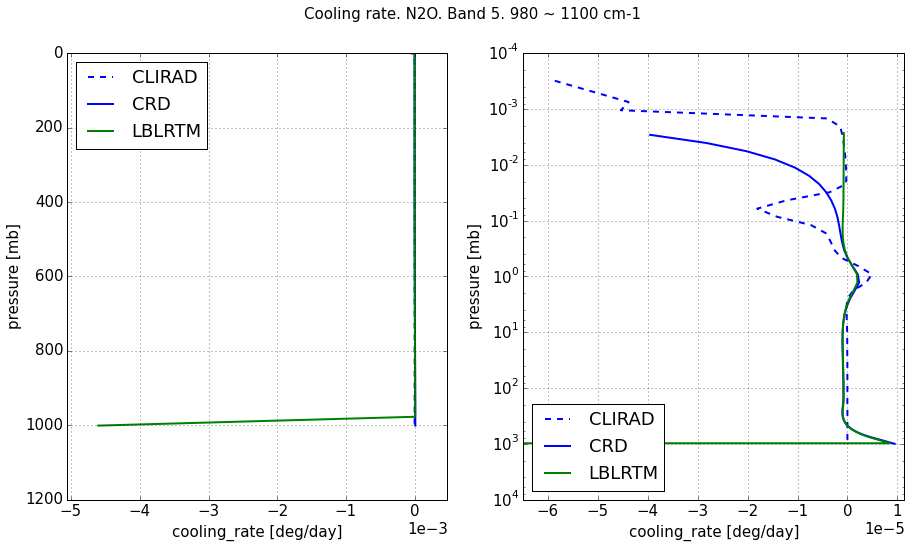


------------------------------------------------------------------------

CLIRAD-LW Spectral band 6. 1100 ~ 1215 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -22.90729  1.971213e-07 -22.907290     -0.004432
30   299.800000 -23.08349  3.964750e-02 -23.043843     -0.003074
0   1013.000000 -23.27341  4.203331e-01 -22.853077      0.006664

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -22.904583   0.000000 -22.904583      0.000000
30   299.800000 -23.067374   0.037822 -23.029552     -0.003251
0   1013.000000 -23.269652   0.431247 -22.838405      0.006909

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -22.885552   0.000000 -22.885552      0.000000
30   299.8000 -23.049513   0.037114 -23.012399     -0.003235
0   1013.0000 -23.254791   0.418236 -22.836555      0.003435

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.002707  1.971

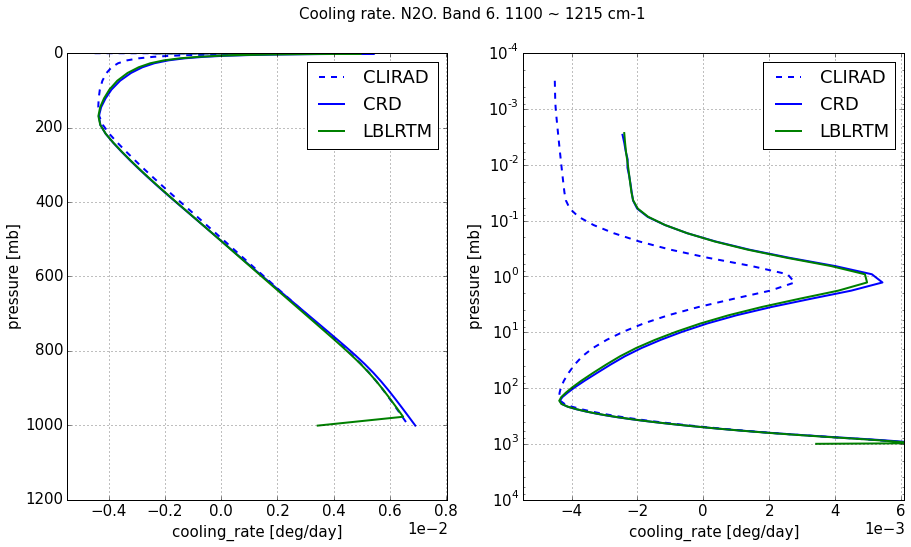


------------------------------------------------------------------------

CLIRAD-LW Spectral band 7. 1215 ~ 1380 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -20.90711  5.611784e-09 -20.907110     -0.000079
30   299.800000 -21.70414  2.511334e-01 -21.453007     -0.018075
0   1013.000000 -23.74060  3.766876e+00 -19.973724      0.054485

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -20.871281   0.000000 -20.871281      0.000000
30   299.800000 -21.602707   0.281527 -21.321180     -0.018765
0   1013.000000 -23.755165   3.883286 -19.871879      0.056457

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -20.812524   0.000000 -20.812524      0.000000
30   299.8000 -21.570456   0.284640 -21.285816     -0.019495
0   1013.0000 -23.736876   3.873357 -19.863519      0.053075

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.035829  5.611

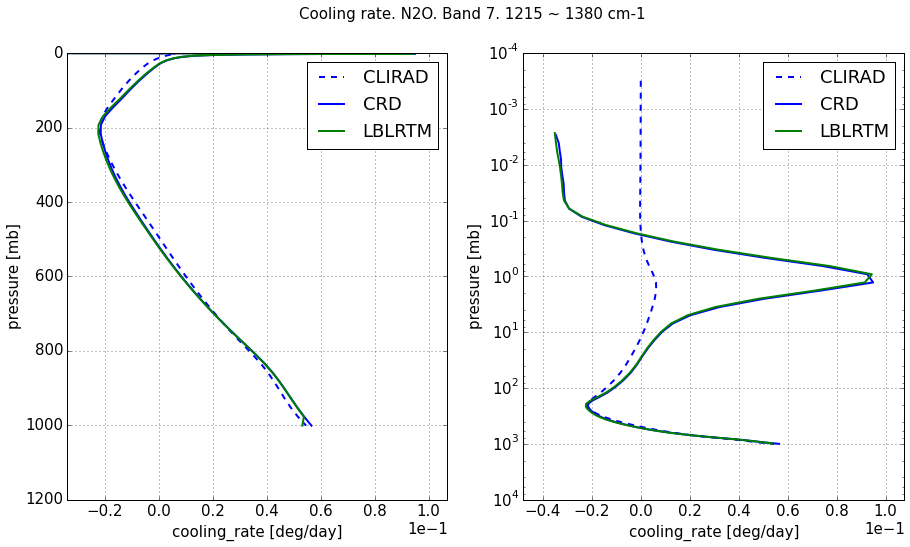


------------------------------------------------------------------------

CLIRAD-LW Spectral band 8. 1380 ~ 1900 cm-1

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.88056  1.657780e-07 -30.880560 -1.230132e-06
30   299.800000 -30.88056  4.821160e-07 -30.880560 -1.326435e-09
0   1013.000000 -30.88056  3.055093e-06 -30.880557  1.175503e-08

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -30.723710   0.000000 -30.723710      0.000000
30   299.800000 -30.726282   0.000192 -30.726090     -0.000063
0   1013.000000 -30.729595   0.004451 -30.725144      0.000091

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -30.677057   0.000000 -30.677057      0.000000
30   299.8000 -30.679559   0.000182 -30.679376     -0.000061
0   1013.0000 -30.697533   0.004228 -30.693305     -0.005172

CLIRAD - CRD
    pressure   flux_up     flux_down  net_flux  cooling_rate
70         0 -0.156850  1.657

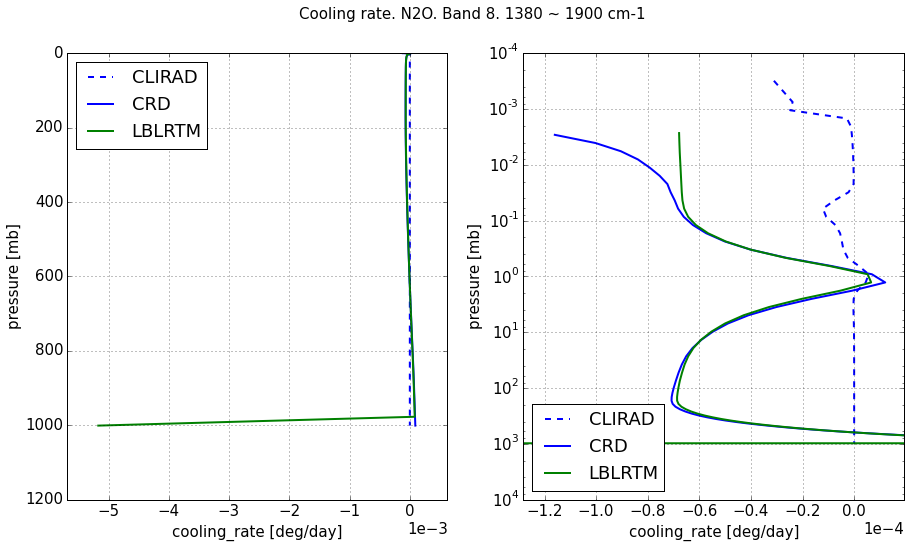


------------------------------------------------------------------------

CLIRAD-LW Spectral band 9. 1900 ~ 3000 cm-1

CLIRAD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -6.674498          0 -6.674498            -0
30   299.800000 -6.674498          0 -6.674498            -0
0   1013.000000 -6.674498          0 -6.674498            -0

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -6.221285   0.000000 -6.221285      0.000000
30   299.800000 -6.277975   0.011544 -6.266431     -0.002223
0   1013.000000 -6.625445   0.405463 -6.219982      0.006118

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -6.105453   0.000000 -6.105453      0.000000
30   299.8000 -6.173397   0.012215 -6.161182     -0.002631
0   1013.0000 -6.614782   0.439217 -6.175566     -0.015553

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  cooling_rate
70         0 -0.453213   0.000000 -0.453213     -0.000000
30    

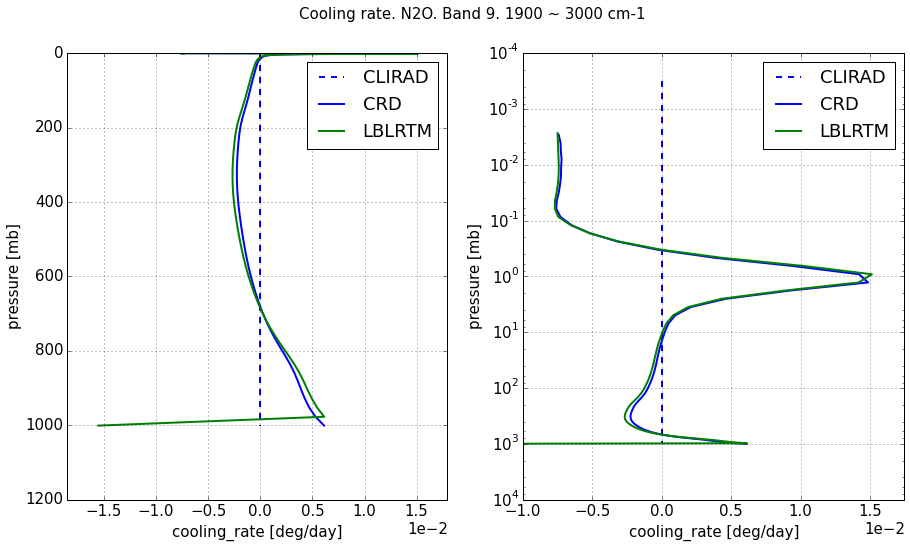


------------------------------------------------------------------------

CLIRAD-LW Spectral band 10. 540 ~ 620 cm-1

CLIRAD
       pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.002417       -0          0         0            -0
30   299.800000       -0          0         0            -0
0   1013.000000       -0          0         0            -0

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -35.017883   0.000000 -35.017883      0.000000
30   299.800000 -35.560492   0.476275 -35.084217     -0.000946
0   1013.000000 -36.235420   2.614966 -33.620454      0.029474

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -35.010330   0.000000 -35.010330      0.000000
30   299.8000 -35.560707   0.474937 -35.085770     -0.001073
0   1013.0000 -36.231410   2.583741 -33.647668      0.026672

CLIRAD - CRD
    pressure    flux_up  flux_down   net_flux  cooling_rate
70         0  35.017883   0.000000  35.017883     -

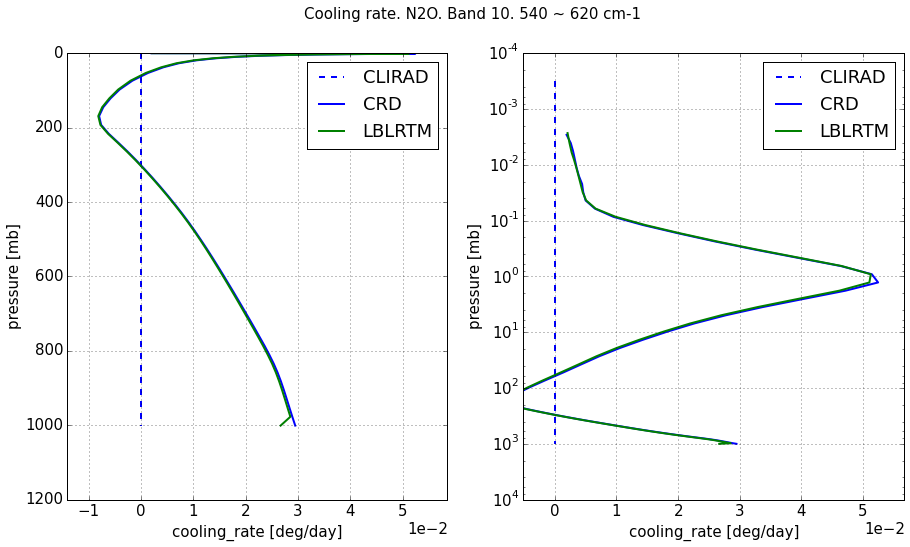


------------------------------------------------------------------------



In [16]:
print('Flux tables and cooling rates in CLIRAD spectral bands')
print()
print()

scripts_intermodel.lw_results_by_cliard_bands(
    infos_clirad=[('CLIRAD', 'b', '--', pnl_clirad)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd),
               ('LBLRTM', 'g', '-', pnl_lblrtm)],
    name_molecule=name_molecule)

In [17]:
html_download = ('<a href="./longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx"'
                 'download>longwave_mls_{name_molecule}'
                 '_by_clirad_bands.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

In [18]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')